[581, 2609, 3415, 3925, 5567, 6245, 6441, 8332, 10998, 11331, 11730, 12803, 13709, 13738, 14446, 14625, 16332, 16953, 17011, 17371, 17397, 18848, 24251, 25470, 28203, 28455, 28779, 29259, 30362, 30601, 31018, 31886, 32736, 33121, 33162, 34147, 36926, 37339, 37548, 37732, 38888, 38946, 44308, 44913, 45556, 46117, 46565, 47898, 48520, 48539]


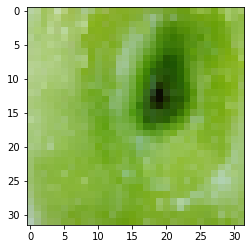

In [50]:

#Extract the data from the ImageNet dataset and save the images

import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import pickle
import torch

# Extract the images from the ImageNet binary file (single file) from the following path



with open("/users/nicolass80/Documents/PoisonFrogs/Imagenet32_val/val_data", "rb") as f:
    data = pickle.load(f)


labels = data["labels"]
images = data["data"]

wolf_idx = [idx for idx, label in enumerate(labels) if label == 318]
wolf_images = images[1]

def restore_image(arr):
    red_channel = arr[:1024].reshape(32, 32)
    green_channel = arr[1024:2048].reshape(32, 32)
    blue_channel = arr[2048:].reshape(32, 32)

    img = np.dstack((red_channel, green_channel, blue_channel))
    return img.astype(np.uint8)



print(wolf_idx)

plt.imshow(restore_image(images[581]))

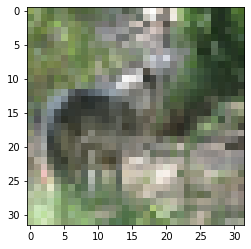

In [38]:
with open("map_clsloc.txt") as f:
    dataset_map = f.readlines()
    dataset_map = [x.strip() for x in dataset_map]
    dataset_map = [x.split(" ") for x in dataset_map]
    dataset_map = {x[0]: [x[1],x[2]] for x in dataset_map}

#Give me all the dic keys that start n0208

#n07742313 318 Granny_Smith
#n02114367 205 timber_wolf


#Save all the images from the vector images that belong to the class 318 (apple) or 205 (wolf)

#Create a folder for the images
if not os.path.exists("/users/nicolass80/Documents/Imagenet32_val/val_images"):
    os.makedirs("/users/nicolass80/Documents/Imagenet32_val/val_images")


apple_images= images[[idx for idx, label in enumerate(labels) if label == 318]]
apple_images = np.array([restore_image(x) for x in apple_images])


wolf_images= images[[idx for idx, label in enumerate(labels) if label == 205]]
wolf_images = np.array([restore_image(x) for x in wolf_images])

plt.imshow(wolf_images[1])


In [42]:
#Save all the images on the wolg_images and apple_images vectors on the /users/nicolass80/Documents/Imagenet32_val/val_images folder

for idx, image in enumerate(apple_images):
    im = Image.fromarray(image)
    im.save("/users/nicolass80/Documents/Imagenet32_val/val_images/apple{}.png".format(idx))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


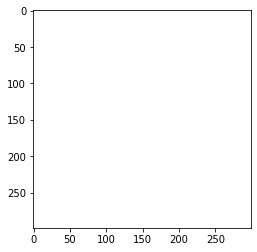

In [75]:

path = '/users/nicolass80/Documents/poison_froggo/poison_frog/datasets/attack_images'

img = torch.load(path)

img = img.detach().numpy()

plt.imshow(img[20].transpose(1,2,0))